# Data Loading

In [18]:
import os


def get_file_names(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    # Filter out directories, leaving only files
    file_names = [file for file in files if os.path.isfile(os.path.join(folder_path, file))]
    return file_names

folder_path = './marked_data'
file_names = get_file_names(folder_path)
print("File names in the folder:")
for file_name in file_names:
    print(file_name)

File names in the folder:
result_with_parameters_0.csv
result_with_parameters_1.csv
result_with_parameters_2.csv


In [19]:
import pandas as pd

data = list()
for i, file_name in enumerate(file_names):
    temp = pd.read_csv(f'./marked_data/{file_name}')
    temp = temp.drop(["index"], axis=1)
    data_for_analysis = temp
    y, X = temp["result"], temp.drop(["result"], axis=1)
    data.append([y, X])

data[2][1]

,close,past_EMA,current_EMA,current_RSI,past_RSI,past_MACD,current_MACD,upper_BB,lower_BB,%K_StochRSI,upper_ST,lower_ST,up_Aroon,low_Aroon
0,270.22,0.062800,0.074286,52.549833,52.991143,0.023506,0.001364,270.751797,269.990203,11.392405,274.176096,266.666977,92.0,28.0
1,270.60,0.074286,0.052095,52.945640,52.549833,0.001364,0.011346,270.777576,269.989424,35.443038,274.176096,266.666977,88.0,24.0
2,270.60,0.052095,0.032168,52.945640,52.945640,0.011346,0.016663,270.780016,270.043984,35.443038,274.176096,266.666977,84.0,20.0
3,270.60,0.032168,0.014287,52.945640,52.945640,0.016663,0.018739,270.797415,270.042585,35.443038,274.176096,266.666977,80.0,16.0
4,270.11,0.014287,0.040048,52.365237,52.945640,0.018739,-0.012638,270.805300,270.001700,0.000000,274.176096,266.666977,76.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21564,276.07,-0.077712,-0.074969,51.333664,51.094821,-0.010906,-0.009423,276.205463,276.010537,1.754386,274.053300,275.641429,48.0,12.0
21565,276.06,-0.074969,-0.071588,51.081684,51.333664,-0.009423,-0.008656,276.206069,276.007931,0.877193,274.053300,275.641429,44.0,8.0
21566,276.10,-0.071588,-0.071903,52.032965,51.081684,-0.008656,-0.005167,276.206108,276.010892,4.424779,274.053300,275.641429,40.0,4.0
21567,276.10,-0.071903,-0.072117,52.032965,52.032965,-0.005167,-0.002696,276.206026,276.013974,4.424779,274.053300,275.641429,36.0,8.0


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# get data
divided_data = list()
for data_train in data:
    divided_data.append(train_test_split(data_train[1], data_train[0], test_size=0.20, random_state = 2020, stratify=data_train[0]))

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 2020, stratify=y)

# Scale Data

In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
for i, data_train in enumerate(divided_data):
    divided_data[i][0] = ss.fit_transform(data_train[0])
    divided_data[i][1] = ss.fit_transform(data_train[1])
    
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

for i, data_train in enumerate(divided_data):
    X_train_list.append(data_train[0])
    X_test_list.append(data_train[1])
    y_train_list.append(data_train[2])
    y_test_list.append(data_train[3])

X_train_scaled = np.concatenate(X_train_list, axis=0)
X_test_scaled = np.concatenate(X_test_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)

X_train_scaled
# X_train_scaled = ss.fit_transform(X_train)
# X_test_scaled = ss.transform(X_test)
# y_train = np.array(y_train)

array([[ 0.71856253, -0.14707739, -0.14723352, ...,  0.76060699,
         0.96219617, -1.34887654],
       [ 0.55370204, -0.27393652, -0.2751535 , ..., -1.37468019,
         0.49027163, -1.34887654],
       [ 0.33976458,  0.53524658,  0.52384315, ...,  0.76060699,
        -1.04348313,  0.90823864],
       ...,
       [-1.77603152,  0.80999259,  0.79432673, ...,  0.81114184,
         0.71508586, -1.13595917],
       [ 0.96269679, -1.14925531, -1.13169194, ..., -0.458156  ,
        -0.48701134,  0.79984405],
       [ 0.40265759,  0.11356442,  0.12695456, ..., -0.375081  ,
         0.23424698, -0.53102067]])

# Learning

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))
display(rfc.score(X_test_scaled, y_test))

0.9999387342495967

0.9133382340929511

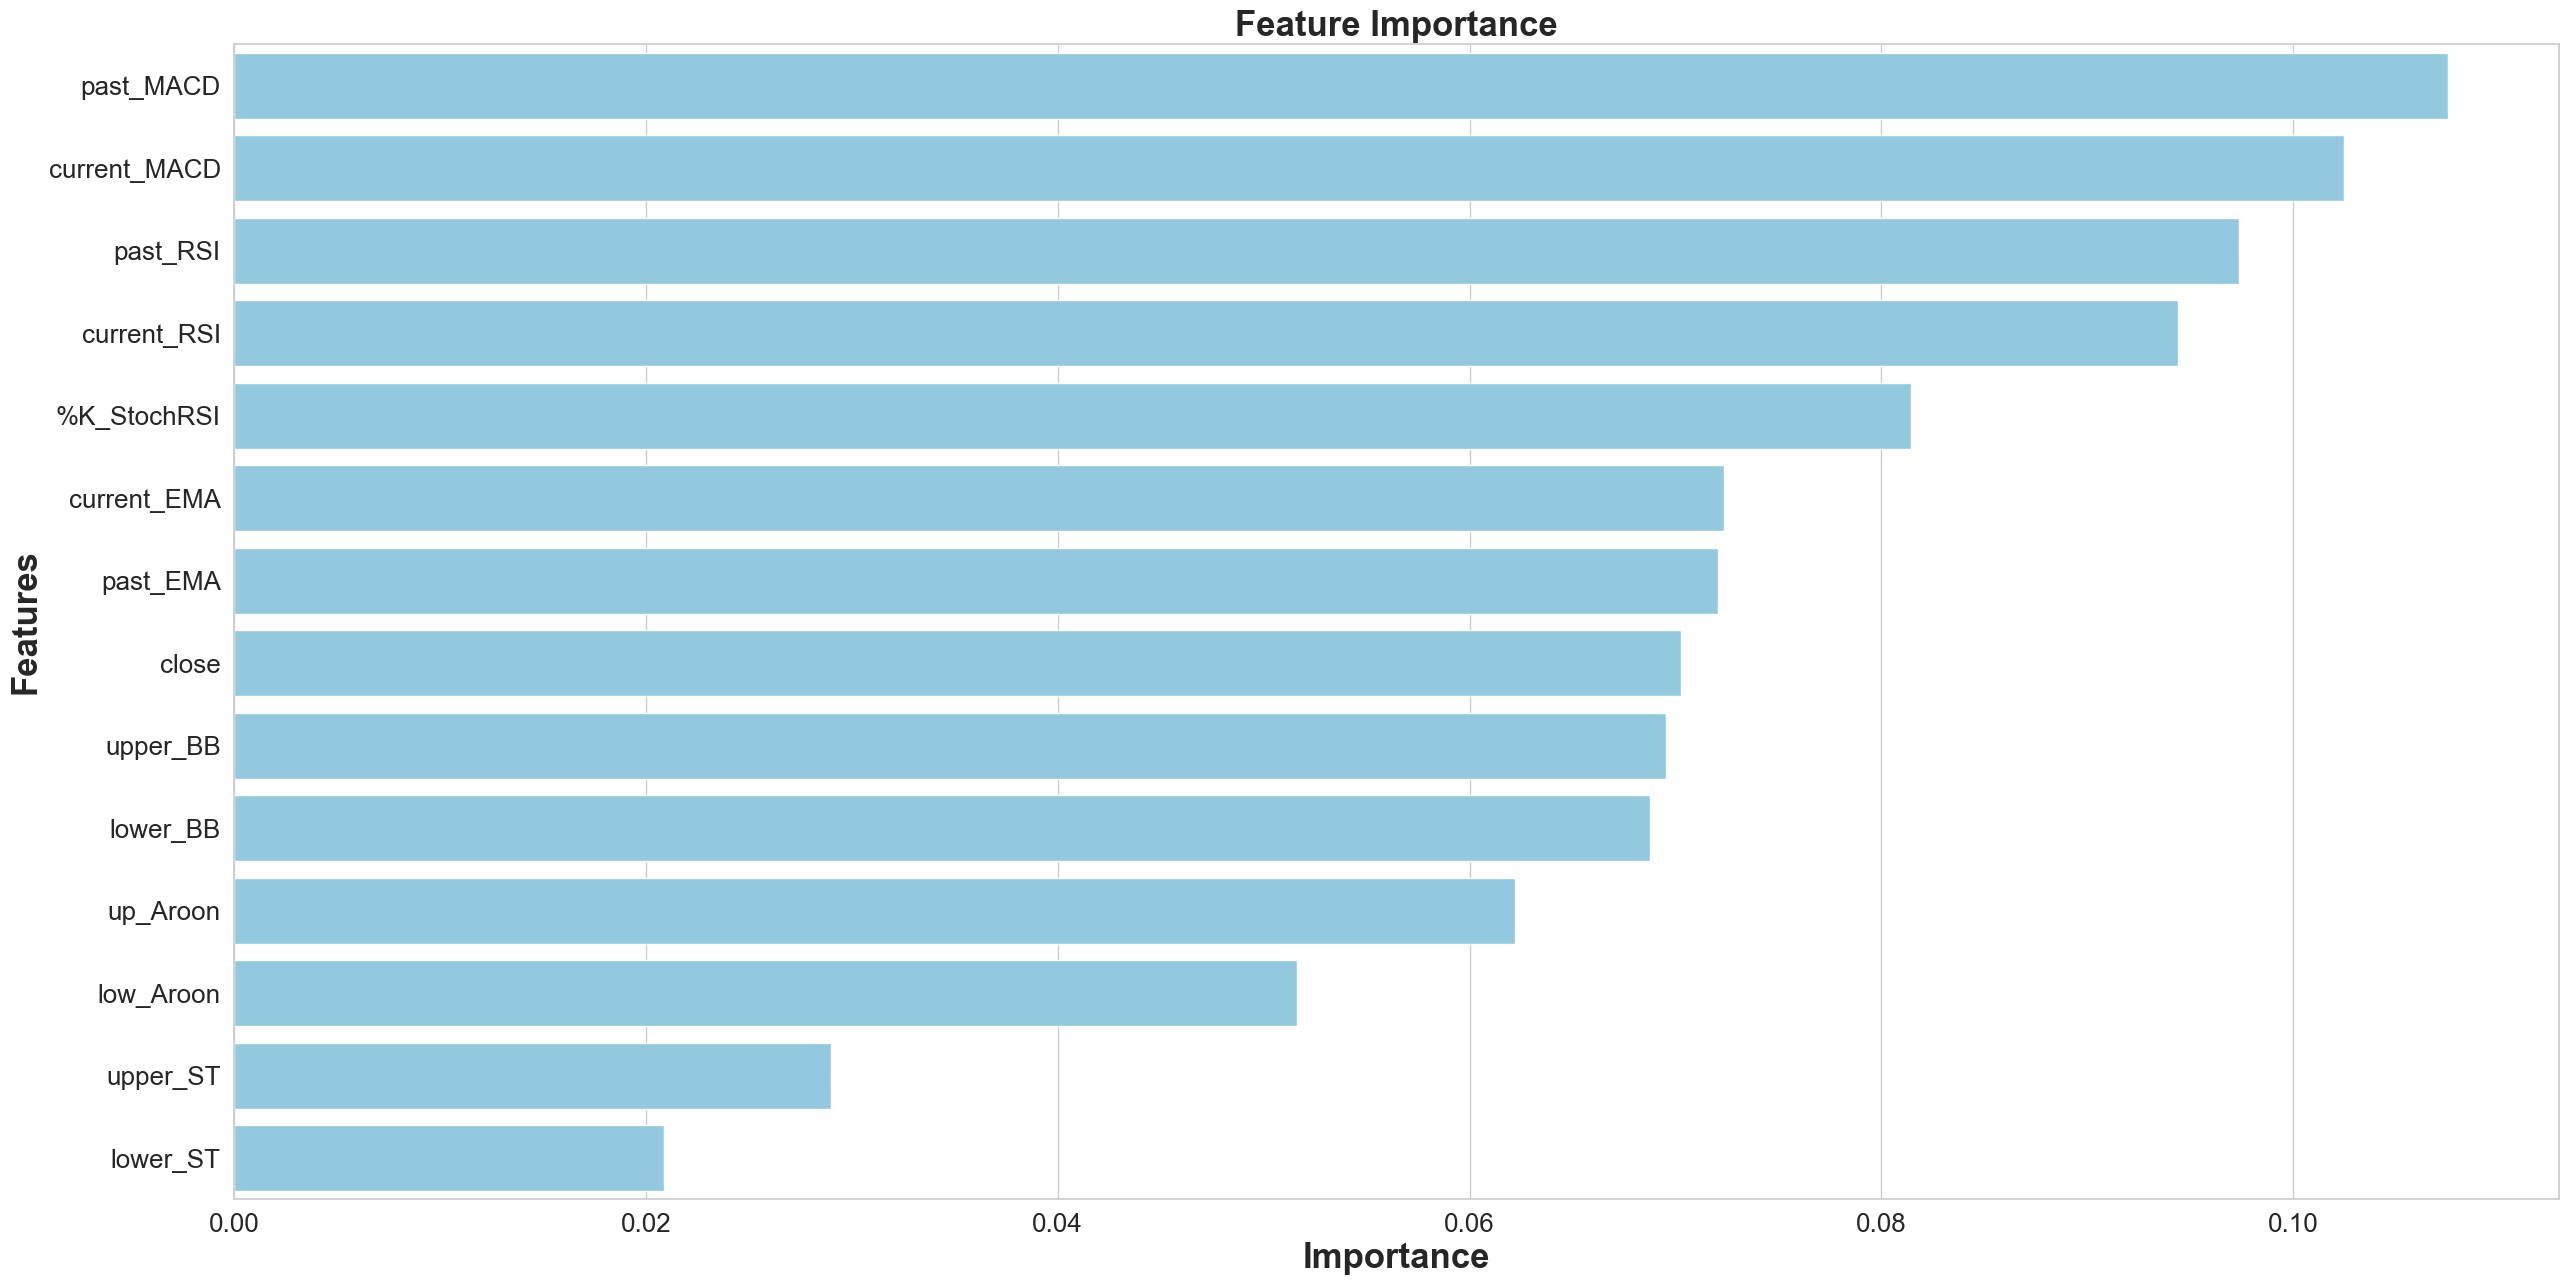

None

,Features,Gini-Importance
0,past_MACD,0.107532
1,current_MACD,0.102467
2,past_RSI,0.097366
3,current_RSI,0.094402
4,%K_StochRSI,0.081456
5,current_EMA,0.072361
6,past_EMA,0.072073
7,close,0.070292
8,upper_BB,0.069527
9,lower_BB,0.068755


In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

feats = {}
for feature, importance in zip(data_for_analysis.drop("result", axis=1).columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

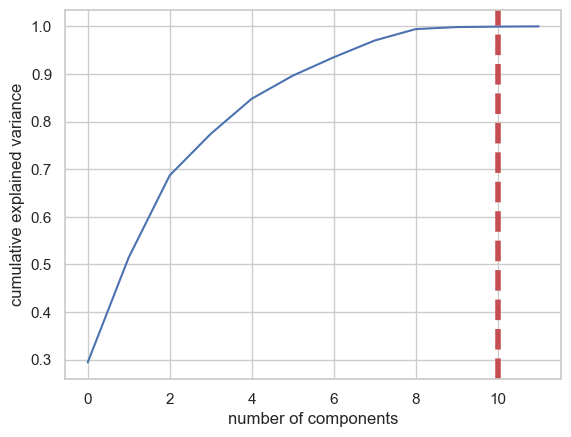

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.293973,0.293973
1,0.514559,0.220586
2,0.686917,0.172358
3,0.774004,0.087088
4,0.847855,0.073850
5,0.896246,0.048391
6,0.934960,0.038714
7,0.970243,0.035283
8,0.994197,0.023954
9,0.998423,0.004226


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca_test = PCA(n_components=12)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [13]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 200,
 'min_samples_split': 39,
 'min_samples_leaf': 44,
 'max_features': 'sqrt',
 'max_depth': 1,
 'bootstrap': True}

In [25]:
"""
just in case
{'n_estimators': 800,
 'min_samples_split': 28,
 'min_samples_leaf': 12,
 'max_features': 'sqrt',
 'max_depth': 14,
 'bootstrap': True}
"""


from sklearn.metrics import confusion_matrix, precision_score

y_pred_probs = rfc.predict_proba(X_test_scaled)[:, 1]

new_threshold = 0.5  # Example: setting a higher threshold

# Adjust the predicted labels based on the new threshold
y_pred = (y_pred_probs >= new_threshold).astype(int)
#y_pred = rfc.predict(X_test_scaled)

conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

display(conf_matrix_baseline)
display('Baseline Random Forest recall score', recall_score(y_test, y_pred))
display('Baseline Random Forest precision score', precision_score(y_test, y_pred))

,predicted 0,predicted 1
actual 0,10980,130
actual 1,928,205


'Baseline Random Forest recall score'

0.18093556928508384

'Baseline Random Forest precision score'

0.6119402985074627

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score

# Create a Gradient Boosting Classifier instance
gbm = GradientBoostingClassifier()

# Fit the model to the training data
gbm.fit(X_train_scaled, y_train)

# Evaluate the model on the training and test data
train_score = gbm.score(X_train_scaled, y_train)
test_score = gbm.score(X_test_scaled, y_test)

print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)

# Calculate recall score on the test data
y_pred_test = gbm.predict(X_test_scaled)
recall = recall_score(y_test, y_pred_test)

conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred_test), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

display(conf_matrix_baseline)
print("Test Recall Score:", recall)

Training Accuracy: 0.9141871056017318
Test Accuracy: 0.9135015927468758


,predicted 0,predicted 1
actual 0,10990,120
actual 1,939,194


Test Recall Score: 0.17122683142100617
